#### `Getting started with PyTorch tensors`
Tensors are the primary data structure in PyTorch and will be the building blocks for our deep learning models. They share many similarities with NumPy arrays but have some unique attributes too.

In this exercise, you'll practice creating a tensor from a Python list of temperature data from two weather stations. The Python list is named __temperatures__ and has two sublists whose elements represent a different day each, with columns for readings from two stations.

#### Instructions
- Begin by importing __PyTorch__.
- Create a tensor from the Python list __temperatures__.

In [1]:
# Import PyTorch
import torch

temperatures = [[72, 75, 78], [70, 73, 76]]

# Create a tensor from temperatures
temp_tensor = torch.tensor(temperatures)
print('This is a list temperatures: ', temperatures)
print('This is a tensor: ')
print(temp_tensor)

This is a list temperatures:  [[72, 75, 78], [70, 73, 76]]
This is a tensor: 
tensor([[72, 75, 78],
        [70, 73, 76]])


#### `Checking and adding tensors`
While continuing your temperature data collection, you realize that the recorded temperatures are off by 2 degrees, so you need to add 2 degrees to the tensor of temperatures. Before adjusting the data, you want to verify the shape and type of the tensor, to make sure they are compatible to be added together. The torch library has been pre-imported.

#### `Instructions`
- Check the shape of the __temperatures__ tensor.
- Check the type of the __temperatures__ tensor.
- Add the __temperatures__ and __adjustment__ tensors.

In [2]:
temperatures = torch.tensor([[72, 75, 78], [70, 73, 76]])
adjustment = torch.tensor([[2, 2, 2], [2, 2, 2]])

# Check the shape of the temperatures tensor
temp_shape = temperatures.shape
print("Shape of temperatures:", temp_shape)

# Check the type of the temperatures tensor
temp_type = temperatures.dtype
print("Data type of temperatures:", temp_type)

# Adjust the temperatures by adding the adjustment tensor
corrected_temperatures = temperatures + adjustment

print("Corrected temperatures:", corrected_temperatures)

Shape of temperatures: torch.Size([2, 3])
Data type of temperatures: torch.int64
Corrected temperatures: tensor([[74, 77, 80],
        [72, 75, 78]])


<h2>Linear_Layer</h2>

In [21]:
import torch.nn as nn

# Define Linear Layer
inp = torch.tensor([[0.3471, 0.4547, -0.2356]])
linear_layer = nn.Linear(in_features=3,
                        out_features=2)
# Forward Pass
out = linear_layer(inp)
print(out)

tensor([[0.0608, 0.3121]], grad_fn=<AddmmBackward0>)


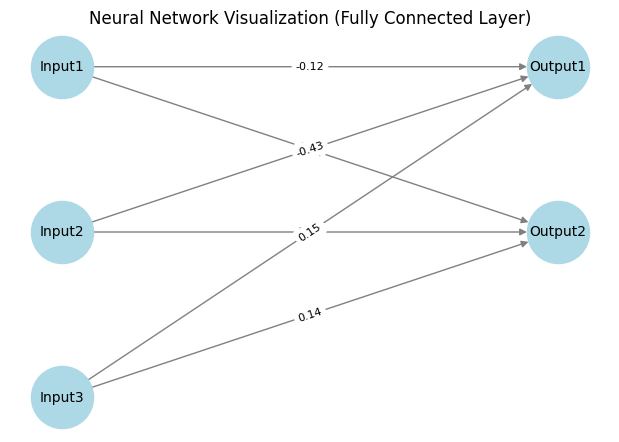

In [22]:
import torch
import torch.nn as nn
import networkx as nx
import matplotlib.pyplot as plt

# Extract weights and biases
W = linear_layer.weight.detach().numpy()
B = linear_layer.bias.detach().numpy()

# Create Graph
G = nx.DiGraph()

# Define node names
input_nodes = [f'Input{i+1}' for i in range(linear_layer.in_features)]
output_nodes = [f'Output{i+1}' for i in range(linear_layer.out_features)]

# Add nodes to graph
G.add_nodes_from(input_nodes)
G.add_nodes_from(output_nodes)

# Add edges with weights
for i, inp_node in enumerate(input_nodes):
    for j, out_node in enumerate(output_nodes):
        G.add_edge(inp_node, out_node, weight=W[j, i])

# Layout for visualization
pos = {}
for i, node in enumerate(input_nodes):
    pos[node] = (0, -i)
for i, node in enumerate(output_nodes):
    pos[node] = (1, -i)

# Draw graph
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)

# Draw edge labels (weights)
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Neural Network Visualization (Fully Connected Layer)")
plt.show()


In [6]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Implement a small neural network with exactly two linear layers
model = nn.Sequential(nn.Linear(in_features=8, out_features=16),
                      nn.Linear(in_features=16, out_features=1)
                     )

output = model(input_tensor)
print(output)

tensor([[-2.2759]], grad_fn=<AddmmBackward0>)


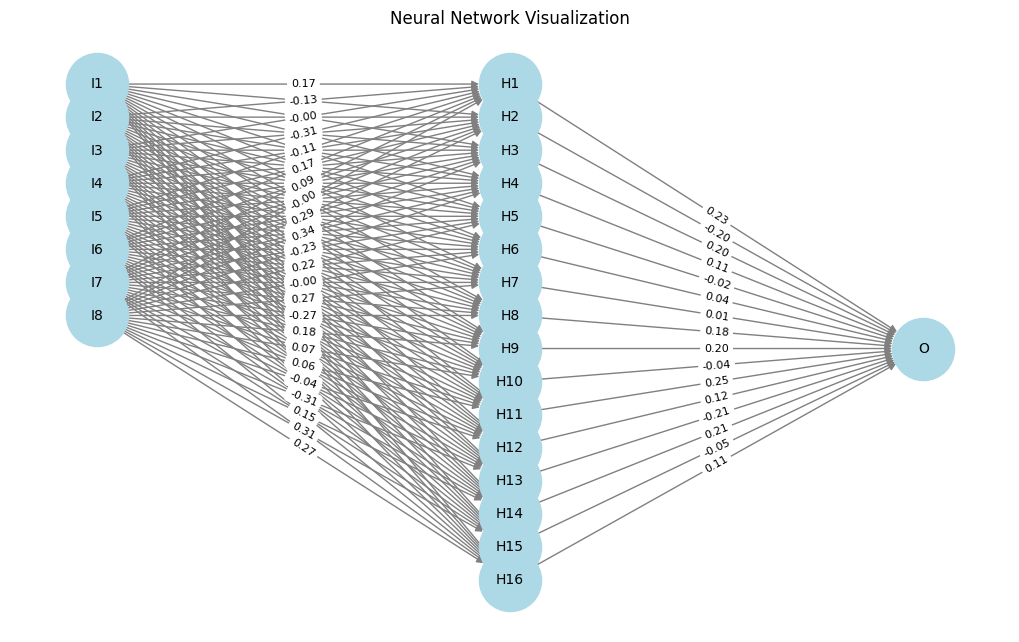

In [5]:
import torch
import torch.nn as nn
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the model
model = nn.Sequential(
    nn.Linear(in_features=8, out_features=16),
    nn.Linear(in_features=16, out_features=1)
)

# Extract weight and bias values
layers = list(model.children())
weights = [layers[0].weight.detach().numpy(), layers[1].weight.detach().numpy()]
biases = [layers[0].bias.detach().numpy(), layers[1].bias.detach().numpy()]

# Create graph
G = nx.DiGraph()

# Define positions
input_nodes = [f'I{i+1}' for i in range(8)]
hidden_nodes = [f'H{i+1}' for i in range(16)]
output_nodes = ['O']
all_nodes = input_nodes + hidden_nodes + output_nodes

# Add nodes to the graph
G.add_nodes_from(all_nodes)

# Add edges with weights from input to hidden layer
for i, inp in enumerate(input_nodes):
    for j, hid in enumerate(hidden_nodes):
        G.add_edge(inp, hid, weight=weights[0][j][i])

# Add edges with weights from hidden to output layer
for j, hid in enumerate(hidden_nodes):
    G.add_edge(hid, 'O', weight=weights[1][0][j])

# Layout for visualization
pos = {}
for i, node in enumerate(input_nodes):
    pos[node] = (0, -i)
for i, node in enumerate(hidden_nodes):
    pos[node] = (1, -i)
pos['O'] = (2, -len(hidden_nodes) // 2)

# Draw graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)

# Draw edge labels (weights)
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Neural Network Visualization")
plt.show()
